In [1]:
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model


In [2]:
train_dir="./images/train"
generator = ImageDataGenerator()
train_ds = generator.flow_from_directory(train_dir,target_size=(256, 256),batch_size=32)
classes = list(train_ds.class_indices.keys())
classes

Found 258 images belonging to 6 classes.


['Aderajew', 'Betty', 'Biruk', 'Maedot', 'Tinsae', 'Yohannes']

### Human Detection Model

In [3]:
def load_human_detection_model():
    human_detector = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Binary classification for Human vs Object
    ])
    human_detector.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return human_detector

# Load human detection model
human_detector = load_human_detection_model()

c:\Users\Awerty\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Main Face Recognition Model

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(classes),activation='softmax'))

In [5]:
optimizer = Adam(learning_rate=0.0001)
model.compile(
optimizer=optimizer,
loss='categorical_crossentropy',
metrics=['accuracy']
)

In [6]:
checkpoint = ModelCheckpoint('FR_model.keras', monitor='val_accuracy', save_best_only=True)
model.fit(train_ds,epochs= 30,callbacks=[checkpoint], batch_size=16)

c:\Users\Awerty\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.2864 - loss: 2.0946
Epoch 2/30


c:\Users\Awerty\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_accuracy available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.5488 - loss: 1.2810
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.6647 - loss: 0.9207
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.7941 - loss: 0.6553
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.8103 - loss: 0.5746
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8710 - loss: 0.4293
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8693 - loss: 0.4284
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9328 - loss: 0.3284
Epoch 9/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9294 - loss: 0.2996
Epoch 10/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9408 - loss: 0.2767
Epoch 11/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9752 - loss: 0.2140
Epoch 12/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9910 - loss: 0.1810
Epoch 13/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9800 - loss: 0.1758
Epoch 14/30
9/9 ━━━━━━━

In [7]:
model.save("FR_model.keras")

In [8]:
model = load_model('FR_model.keras', compile=False)


### Export the model to SavedModel format

In [9]:
tf_model = load_model('FR_model.keras', compile=False)
tf_model.export('saved_model_format')


# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_saved_model('saved_model_format')
tflite_model = converter.convert()
# Save the TFLite model
with open('FR_model_lite.tflite', 'wb') as f:
    f.write(tflite_model)
print("Model converted to TFLite and saved as 'FR_model.keras'.")
tf_model.summary()

INFO:tensorflow:Assets written to: saved_model_format\assets


INFO:tensorflow:Assets written to: saved_model_format\assets


Saved artifact at 'saved_model_format'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  2438237682192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2438284620432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2438284621008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2438284621200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2438284620048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2438284620624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2438284621968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2438284623120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2438284622736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2438284623504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2438284622352: TensorSpec(shape

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 127, 127, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 62, 62, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 14, 14, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 32)     │        27,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 6, 6, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 288,902 (1.10 MB)

 Trainable params: 288,326 (1.10 MB)

 Non-trainable params: 576 (2.25 KB)

### Test the TFLite model

In [10]:
def test_tflite_model(image_path):
    print("Testing TFLite model...")
    img = image.load_img(image_path, target_size=(256, 256))
    img_array = np.expand_dims(image.img_to_array(img) / 255.0, axis=0).astype(np.float32)

     # Step 1: Human Detection
    is_human = human_detector.predict(img_array)[0][0] > 0.3  # Threshold for human detection
    if not is_human:
        print("This is an object.")
        return "Object"

    # Load the TFLite model
    interpreter = tf.lite.Interpreter(model_path="FR_model_lite.tflite")
    interpreter.allocate_tensors()
    # Get input and output details
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    # Preprocess the input image
    img = image.load_img(image_path, target_size=(256,256))
    input_data = np.expand_dims(image.img_to_array(img), axis=0).astype(np.float32)

    # Verify input shape and type
    print("Input shape:", input_data.shape)
    print("Expected shape:", input_details[0]['shape'])
    print("Input type:", input_data.dtype)
    print("Expected type:", input_details[0]['dtype'])

    # Set the input tensor
    interpreter.set_tensor(input_details[0]['index'], input_data)

    # Run inference
    interpreter.invoke()

    # Get the prediction
    output_data = interpreter.get_tensor(output_details[0]['index'])
    print("Raw output:", output_data) 
    predicted_class = np.argmax(output_data)
    print(f"predictedIndex :{predicted_class}")
    print(f"Predicted class: {classes[predicted_class]}")



test_tflite_model("./images/test/betty/betty_7.jpg")
test_tflite_model("./images/test/Biruk/biruk_11.jpg")
test_tflite_model("./images/test/Biruk/biruk_6.jpg")
test_tflite_model("./images/test/betty/betty_2.jpg")
test_tflite_model("./images/test/Yohannes/yo_9.jpg")
test_tflite_model("./images/test/Tinsae/tin_11.jpg")
test_tflite_model("./images/test/Tinsae/tin_9.jpg")
test_tflite_model("./images/test/Yohannes/yo_16.jpg")
test_tflite_model("./images/test/Maedot/maddy_12.jpg")
test_tflite_model("./images/test/Aderajew/ade_4.jpg")



Testing TFLite model...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step
Input shape: (1, 256, 256, 3)
Expected shape: [  1 256 256   3]
Input type: float32
Expected type: <class 'numpy.float32'>
Raw output: [[0.04064277 0.01396889 0.01463498 0.46060994 0.35564527 0.11449822]]
predictedIndex :3
Predicted class: Maedot
Testing TFLite model...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Input shape: (1, 256, 256, 3)
Expected shape: [  1 256 256   3]
Input type: float32
Expected type: <class 'numpy.float32'>
Raw output: [[0.01152876 0.04544334 0.34256828 0.30255353 0.16692853 0.13097757]]
predictedIndex :2
Predicted class: Biruk
Testing TFLite model...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Input shape: (1, 256, 256, 3)
Expected shape: [  1 256 256   3]
Input type: float32
Expected type: <class 'numpy.float32'>
Raw output: [[0.03093821 0.01237531 0.7824883  0.05578847 0.0934234  0.0249863 ]]
predictedIndex :2
Predicted class: Biruk
Testing TFLite model...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Input shape:

In [11]:
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(256,256,3))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    pred = model.predict(images, batch_size=32)
    print("Predicted: "+classes[np.argmax(pred)])

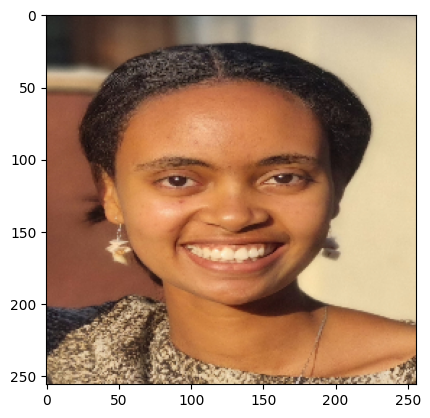

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
Predicted: Maedot


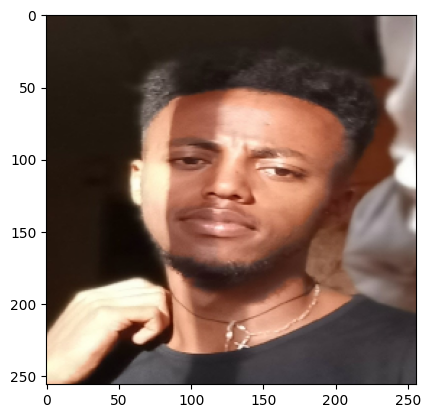

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predicted: Biruk


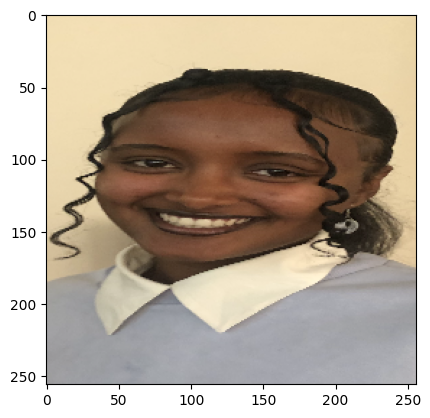

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted: Tinsae


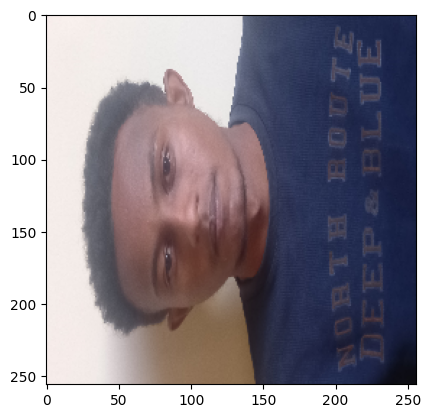

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predicted: Yohannes


In [12]:
predict_image("./images/test/Betty/betty_2.jpg")
predict_image("./images/test/Biruk/biruk_11.jpg")
predict_image("./images/test/Tinsae/tin_11.jpg")
predict_image("./images/test/Yohannes/yo_16.jpg")